In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv(r'C:\Users\NAVEENA\Downloads\Property_Price_Train.csv')
test=pd.read_csv(r'C:\Users\NAVEENA\Downloads\Property_Price_Test.csv')

In [3]:
train.shape, test.shape

((1459, 81), (1459, 80))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

# cleanning the data

In [5]:
def check_null_percentage(train):
    Missing_info=pd.DataFrame(np.array(train.isnull().sum().sort_values(ascending=False).reset_index())\
                            ,columns=['Columns','Missing_Percentage']).query("Missing_Percentage > 0").set_index('Columns')
    return 100*Missing_info/train.shape[0]

In [6]:
check_null_percentage(train)

,Missing_Percentage
Columns,
Pool_Quality,99.520219
Miscellaneous_Feature,96.298835
Lane_Type,93.762851
Fence_Quality,80.740233
Fireplace_Quality,47.224126
Lot_Extent,17.751885
Garage_Built_Year,5.551748
Garage_Condition,5.551748
Garage,5.551748


# Divide  data into 2 parts catagorical and numerical

In [7]:
num=train.columns[train.dtypes!='object']
cat=train.columns[train.dtypes=='object']
train[num].isnull().sum()

Id                             0
Building_Class                 0
Lot_Extent                   259
Lot_Size                       0
Overall_Material               0
House_Condition                0
Construction_Year              0
Remodel_Year                   0
Brick_Veneer_Area              8
BsmtFinSF1                     0
BsmtFinSF2                     0
BsmtUnfSF                      0
Total_Basement_Area            0
First_Floor_Area               0
Second_Floor_Area              0
LowQualFinSF                   0
Grade_Living_Area              0
Underground_Full_Bathroom      0
Underground_Half_Bathroom      0
Full_Bathroom_Above_Grade      0
Half_Bathroom_Above_Grade      0
Bedroom_Above_Grade            0
Kitchen_Above_Grade            0
Rooms_Above_Grade              0
Fireplaces                     0
Garage_Built_Year             81
Garage_Size                    0
Garage_Area                    0
W_Deck_Area                    0
Open_Lobby_Area                0
Enclosed_L

In [8]:
train=train.drop(['Id','Garage_Built_Year'],axis=1)

In [9]:
train.Lot_Extent=train.Lot_Extent.fillna(train.Lot_Extent.median())
train.Brick_Veneer_Area=train.Brick_Veneer_Area.fillna(train.Brick_Veneer_Area.median())

In [10]:
num=train.columns[train.dtypes!='object']
train[num].isnull().sum()

Building_Class               0
Lot_Extent                   0
Lot_Size                     0
Overall_Material             0
House_Condition              0
Construction_Year            0
Remodel_Year                 0
Brick_Veneer_Area            0
BsmtFinSF1                   0
BsmtFinSF2                   0
BsmtUnfSF                    0
Total_Basement_Area          0
First_Floor_Area             0
Second_Floor_Area            0
LowQualFinSF                 0
Grade_Living_Area            0
Underground_Full_Bathroom    0
Underground_Half_Bathroom    0
Full_Bathroom_Above_Grade    0
Half_Bathroom_Above_Grade    0
Bedroom_Above_Grade          0
Kitchen_Above_Grade          0
Rooms_Above_Grade            0
Fireplaces                   0
Garage_Size                  0
Garage_Area                  0
W_Deck_Area                  0
Open_Lobby_Area              0
Enclosed_Lobby_Area          0
Three_Season_Lobby_Area      0
Screen_Lobby_Area            0
Pool_Area                    0
Miscella

In [11]:
train[cat].isnull().sum()

Zoning_Class                0
Road_Type                   0
Lane_Type                1368
Property_Shape              0
Land_Outline                0
Utility_Type                0
Lot_Configuration           0
Property_Slope              0
Neighborhood                0
Condition1                  0
Condition2                  0
House_Type                  0
House_Design                0
Roof_Design                 0
Roof_Quality                0
Exterior1st                 0
Exterior2nd                 0
Brick_Veneer_Type           8
Exterior_Material           0
Exterior_Condition          0
Foundation_Type             0
Basement_Height            37
Basement_Condition         37
Exposure_Level             38
BsmtFinType1               37
BsmtFinType2               38
Heating_Type                0
Heating_Quality             0
Air_Conditioning            0
Electrical_System           1
Kitchen_Quality             0
Functional_Rate             0
Fireplace_Quality         689
Garage    

In [12]:
train=train.drop(['Lane_Type','Pool_Quality','Fence_Quality','Fence_Quality','Miscellaneous_Feature','Fireplace_Quality'],axis=1)

In [13]:
train.Garage_Condition.value_counts()

TA    1325
Fa      35
Gd       9
Po       7
Ex       2
Name: Garage_Condition, dtype: int64

In [14]:
train.Brick_Veneer_Type=train.Brick_Veneer_Type.fillna('BrkCmn')
train.Basement_Height=train.Basement_Height.fillna('Fa')
train.Basement_Condition=train.Basement_Condition.fillna('TA')
train.Exposure_Level=train.Exposure_Level.fillna('Mn')
train.BsmtFinType1=train.BsmtFinType1.fillna('LwQ')
train.BsmtFinType2=train.BsmtFinType2.fillna('GLQ')
train.Electrical_System=train.Electrical_System.fillna('Mix')
train.Garage =train.Garage .fillna('2Types')
train.Garage_Finish_Year=train.Garage_Finish_Year.fillna('Fin')
train.Garage_Quality=train.Garage_Quality.fillna('Po')
train.Garage_Condition=train.Garage_Condition.fillna('Ex')

In [15]:
cat=train.columns[train.dtypes=='object']
train[cat].isnull().sum()

Zoning_Class          0
Road_Type             0
Property_Shape        0
Land_Outline          0
Utility_Type          0
Lot_Configuration     0
Property_Slope        0
Neighborhood          0
Condition1            0
Condition2            0
House_Type            0
House_Design          0
Roof_Design           0
Roof_Quality          0
Exterior1st           0
Exterior2nd           0
Brick_Veneer_Type     0
Exterior_Material     0
Exterior_Condition    0
Foundation_Type       0
Basement_Height       0
Basement_Condition    0
Exposure_Level        0
BsmtFinType1          0
BsmtFinType2          0
Heating_Type          0
Heating_Quality       0
Air_Conditioning      0
Electrical_System     0
Kitchen_Quality       0
Functional_Rate       0
Garage                0
Garage_Finish_Year    0
Garage_Quality        0
Garage_Condition      0
Pavedd_Drive          0
Sale_Type             0
Sale_Condition        0
dtype: int64

In [16]:
train[cat].dtypes

Zoning_Class          object
Road_Type             object
Property_Shape        object
Land_Outline          object
Utility_Type          object
Lot_Configuration     object
Property_Slope        object
Neighborhood          object
Condition1            object
Condition2            object
House_Type            object
House_Design          object
Roof_Design           object
Roof_Quality          object
Exterior1st           object
Exterior2nd           object
Brick_Veneer_Type     object
Exterior_Material     object
Exterior_Condition    object
Foundation_Type       object
Basement_Height       object
Basement_Condition    object
Exposure_Level        object
BsmtFinType1          object
BsmtFinType2          object
Heating_Type          object
Heating_Quality       object
Air_Conditioning      object
Electrical_System     object
Kitchen_Quality       object
Functional_Rate       object
Garage                object
Garage_Finish_Year    object
Garage_Quality        object
Garage_Conditi

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
train.Zoning_Class = le.fit_transform(train.Zoning_Class)
train.Property_Shape =le.fit_transform(train.Property_Shape)
train.Road_Type =le.fit_transform(train.Road_Type)
train.Land_Outline =le.fit_transform(train.Land_Outline)
train.Utility_Type =le.fit_transform(train.Utility_Type)
train.Lot_Configuration =le.fit_transform(train.Lot_Configuration)
train.Property_Slope =le.fit_transform(train.Property_Slope)
train.Neighborhood =le.fit_transform(train.Neighborhood)
train.Condition1 =le.fit_transform(train.Condition1)
train.Condition2 =le.fit_transform(train.Condition2)
train.House_Type =le.fit_transform(train.House_Type)
train.House_Design =le.fit_transform(train.House_Design)
train.Roof_Design =le.fit_transform(train.Roof_Design)
train.Roof_Quality =le.fit_transform(train.Roof_Quality)
train.Exterior1st =le.fit_transform(train.Exterior1st)
train.Exterior2nd =le.fit_transform(train.Exterior2nd)
train.Brick_Veneer_Type =le.fit_transform(train.Brick_Veneer_Type)
train.Exterior_Material =le.fit_transform(train.Exterior_Material)
train.Exterior_Condition =le.fit_transform(train.Exterior_Condition)
train.Foundation_Type =le.fit_transform(train.Foundation_Type)
train.Basement_Height =le.fit_transform(train.Basement_Height)
train.Basement_Condition =le.fit_transform(train.Basement_Condition)
train.Exposure_Level =le.fit_transform(train.Exposure_Level)
train.BsmtFinType1 =le.fit_transform(train.BsmtFinType1)
train.BsmtFinType2 =le.fit_transform(train.BsmtFinType2)
train.Heating_Type =le.fit_transform(train.Heating_Type)
train.Heating_Quality = le.fit_transform(train.Heating_Quality)
train.Air_Conditioning = le.fit_transform(train.Air_Conditioning)
train.Electrical_System = le.fit_transform(train.Electrical_System)
train.Kitchen_Quality = le.fit_transform(train.Kitchen_Quality)
train.Functional_Rate = le.fit_transform(train.Functional_Rate)
train.Garage = le.fit_transform(train.Garage)
train.Garage_Finish_Year = le.fit_transform(train.Garage_Finish_Year)
train.Garage_Quality = le.fit_transform(train.Garage_Quality)
train.Garage_Condition = le.fit_transform(train.Garage_Condition)
train.Pavedd_Drive = le.fit_transform(train.Pavedd_Drive)
train.Sale_Type = le.fit_transform(train.Sale_Type)
train.Sale_Condition = le.fit_transform(train.Sale_Condition)
train.Heating_Quality = le.fit_transform(train.Heating_Quality)

In [19]:
train.dtypes

Building_Class      int64
Zoning_Class        int32
Lot_Extent        float64
Lot_Size            int64
Road_Type           int32
                   ...   
Month_Sold          int64
Year_Sold           int64
Sale_Type           int32
Sale_Condition      int32
Sale_Price          int64
Length: 74, dtype: object

In [20]:
num1=test.columns[test.dtypes!='object']
cat1=test.columns[test.dtypes=='object']
test[num1].isnull().sum()

Id                             0
Building_Class                 0
Lot_Extent                   227
Lot_Size                       0
Overall_Material               0
House_Condition                0
Construction_Year              0
Remodel_Year                   0
Brick_Veneer_Area             15
BsmtFinSF1                     1
BsmtFinSF2                     1
BsmtUnfSF                      1
Total_Basement_Area            1
First_Floor_Area               0
Second_Floor_Area              0
LowQualFinSF                   0
Grade_Living_Area              0
Underground_Full_Bathroom      2
Underground_Half_Bathroom      2
Full_Bathroom_Above_Grade      0
Half_Bathroom_Above_Grade      0
Bedroom_Above_Grade            0
Kitchen_Above_Grade            0
Rooms_Above_Grade              0
Fireplaces                     0
Garage_Built_Year             78
Garage_Size                    1
Garage_Area                    1
W_Deck_Area                    0
Open_Lobby_Area                0
Enclosed_L

In [21]:
test=test.drop(['Id','Garage_Built_Year'],axis=1)

In [22]:
test.Lot_Extent=test.Lot_Extent.fillna(test.Lot_Extent.mean())
test.Brick_Veneer_Area =test.Brick_Veneer_Area .fillna(test.Brick_Veneer_Area .mean())
test.BsmtFinSF1=test.BsmtFinSF1.fillna(test.BsmtFinSF1.mean())
test.BsmtFinSF2=test.BsmtFinSF2.fillna(test.BsmtFinSF2.mean())
test.BsmtUnfSF=test.BsmtUnfSF.fillna(test.BsmtUnfSF.mean())
test.Total_Basement_Area =test.Total_Basement_Area .fillna(test.Total_Basement_Area .mean())
test.Underground_Full_Bathroom =test.Underground_Full_Bathroom .fillna(test.Underground_Full_Bathroom .mean())
test.Underground_Half_Bathroom=test.Underground_Half_Bathroom.fillna(test.Underground_Half_Bathroom.mean())
test.Garage_Size=test.Garage_Size.fillna(test.Garage_Size.mean())
test.Garage_Area=test.Garage_Area.fillna(test.Garage_Area.mean())

In [23]:
num1=test.columns[test.dtypes!='object']
test[num1].isnull().sum()

Building_Class               0
Lot_Extent                   0
Lot_Size                     0
Overall_Material             0
House_Condition              0
Construction_Year            0
Remodel_Year                 0
Brick_Veneer_Area            0
BsmtFinSF1                   0
BsmtFinSF2                   0
BsmtUnfSF                    0
Total_Basement_Area          0
First_Floor_Area             0
Second_Floor_Area            0
LowQualFinSF                 0
Grade_Living_Area            0
Underground_Full_Bathroom    0
Underground_Half_Bathroom    0
Full_Bathroom_Above_Grade    0
Half_Bathroom_Above_Grade    0
Bedroom_Above_Grade          0
Kitchen_Above_Grade          0
Rooms_Above_Grade            0
Fireplaces                   0
Garage_Size                  0
Garage_Area                  0
W_Deck_Area                  0
Open_Lobby_Area              0
Enclosed_Lobby_Area          0
Three_Season_Lobby_Area      0
Screen_Lobby_Area            0
Pool_Area                    0
Miscella

In [24]:
test[cat1].isnull().sum()

Zoning_Class                4
Road_Type                   0
Lane_Type                1352
Property_Shape              0
Land_Outline                0
Utility_Type                2
Lot_Configuration           0
Property_Slope              0
Neighborhood                0
Condition1                  0
Condition2                  0
House_Type                  0
House_Design                0
Roof_Design                 0
Roof_Quality                0
Exterior1st                 1
Exterior2nd                 1
Brick_Veneer_Type          16
Exterior_Material           0
Exterior_Condition          0
Foundation_Type             0
Basement_Height            44
Basement_Condition         45
Exposure_Level             44
BsmtFinType1               42
BsmtFinType2               42
Heating_Type                0
Heating_Quality             0
Air_Conditioning            0
Electrical_System           0
Kitchen_Quality             1
Functional_Rate             2
Fireplace_Quality         730
Garage    

In [25]:
test=test.drop(['Lane_Type','Fireplace_Quality','Pool_Quality','Fence_Quality','Fence_Quality','Miscellaneous_Feature'],axis=1)

In [26]:
test.Sale_Type.value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: Sale_Type, dtype: int64

In [27]:
test.Zoning_Class=train.Zoning_Class.fillna('RHD')
test.Utility_Type=train.Utility_Type.fillna('AllPub')
test.Exterior1st=train.Exterior1st.fillna('CB')
test.Exterior2nd=train.Exterior2nd.fillna('Stone')
test.Brick_Veneer_Type=train.Brick_Veneer_Type.fillna('BrkCmn ')
test.Basement_Height=train.Basement_Height.fillna('Fa')
test.Basement_Condition=train.Basement_Condition.fillna('Po')
test.Exposure_Level=train.Exposure_Level.fillna('Mn')
test.BsmtFinType1=train.BsmtFinType1.fillna('LwQ')
test.BsmtFinType2=train.BsmtFinType2.fillna('GLQ')
test.Kitchen_Quality=train.Kitchen_Quality.fillna('Fa')
test.Functional_Rate=train.Functional_Rate.fillna('Ms')
test.Garage=train.Garage.fillna('CarPort')
test.Garage_Finish_Year=train.Garage_Finish_Year.fillna('Fin')
test.Garage_Quality=train.Garage_Quality.fillna('Po')
test.Garage_Condition=train.Garage_Condition.fillna('Ex')
test.Sale_Type=train.Sale_Type.fillna('ConLw ')

In [28]:
cat1=test.columns[test.dtypes=='object']
test[cat1].isnull().sum()

Road_Type             0
Property_Shape        0
Land_Outline          0
Lot_Configuration     0
Property_Slope        0
Neighborhood          0
Condition1            0
Condition2            0
House_Type            0
House_Design          0
Roof_Design           0
Roof_Quality          0
Exterior_Material     0
Exterior_Condition    0
Foundation_Type       0
Heating_Type          0
Heating_Quality       0
Air_Conditioning      0
Electrical_System     0
Pavedd_Drive          0
Sale_Condition        0
dtype: int64

In [29]:
test[cat1].dtypes

Road_Type             object
Property_Shape        object
Land_Outline          object
Lot_Configuration     object
Property_Slope        object
Neighborhood          object
Condition1            object
Condition2            object
House_Type            object
House_Design          object
Roof_Design           object
Roof_Quality          object
Exterior_Material     object
Exterior_Condition    object
Foundation_Type       object
Heating_Type          object
Heating_Quality       object
Air_Conditioning      object
Electrical_System     object
Pavedd_Drive          object
Sale_Condition        object
dtype: object

In [30]:
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [31]:
train.shape,test.shape

((1459, 74), (1459, 73))

# EDA(Exploratory data analysis)


In [32]:
train_1=train.corr()
train_1

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
Building_Class,1.000000,0.035882,-0.356678,-0.139852,-0.024937,0.119793,-0.002752,-0.022865,0.076301,-0.025814,...,0.030441,-0.043906,-0.026199,0.008244,-0.007738,-0.013660,-0.021330,0.012656,-0.024822,-0.084563
Zoning_Class,0.035882,1.000000,-0.105955,-0.034453,0.087656,0.061923,-0.017845,-0.001193,-0.009877,-0.022062,...,-0.004703,0.000359,0.019081,-0.003130,0.009290,-0.031500,-0.020623,0.097450,0.009500,-0.166896
Lot_Extent,-0.356678,-0.105955,1.000000,0.304537,-0.037360,-0.139026,-0.076134,-0.001023,-0.177944,0.065642,...,-0.009541,0.061965,0.037700,0.180833,-0.000241,0.010470,0.006358,-0.031464,0.058826,0.334865
Lot_Size,-0.139852,-0.034453,0.304537,1.000000,-0.197129,-0.165317,-0.149076,0.010122,-0.121152,0.436867,...,0.003951,0.020418,0.043151,0.077670,0.038064,0.001200,-0.014256,0.012305,0.034178,0.263843
Road_Type,-0.024937,0.087656,-0.037360,-0.197129,1.000000,-0.010259,0.115985,0.001683,0.013935,-0.179353,...,-0.002879,0.007479,-0.033149,0.004416,-0.022729,0.003695,-0.025050,0.014326,0.006055,0.041057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Month_Sold,-0.013660,-0.031500,0.010470,0.001200,0.003695,-0.033400,-0.011573,-0.051554,0.018954,0.007053,...,-0.027018,0.029465,0.023196,-0.033742,-0.006502,1.000000,-0.145712,-0.047362,0.013338,0.046401
Year_Sold,-0.021330,-0.020623,0.006358,-0.014256,-0.025050,0.036384,0.020478,0.023355,-0.006051,-0.002283,...,-0.019800,0.018656,0.010720,-0.059683,0.004915,-0.145712,1.000000,-0.002357,0.003861,-0.028884
Sale_Type,0.012656,0.097450,-0.031464,0.012305,0.014326,-0.001073,-0.025823,-0.126768,0.014197,0.054910,...,-0.034601,-0.009010,0.004591,0.011024,0.015793,-0.047362,-0.002357,1.000000,0.184031,-0.054826
Sale_Condition,-0.024822,0.009500,0.058826,0.034178,0.006055,-0.038234,0.033766,-0.089698,0.051500,-0.043064,...,-0.002685,0.004396,-0.020057,-0.067243,0.013040,0.013338,0.003861,0.184031,1.000000,0.213168


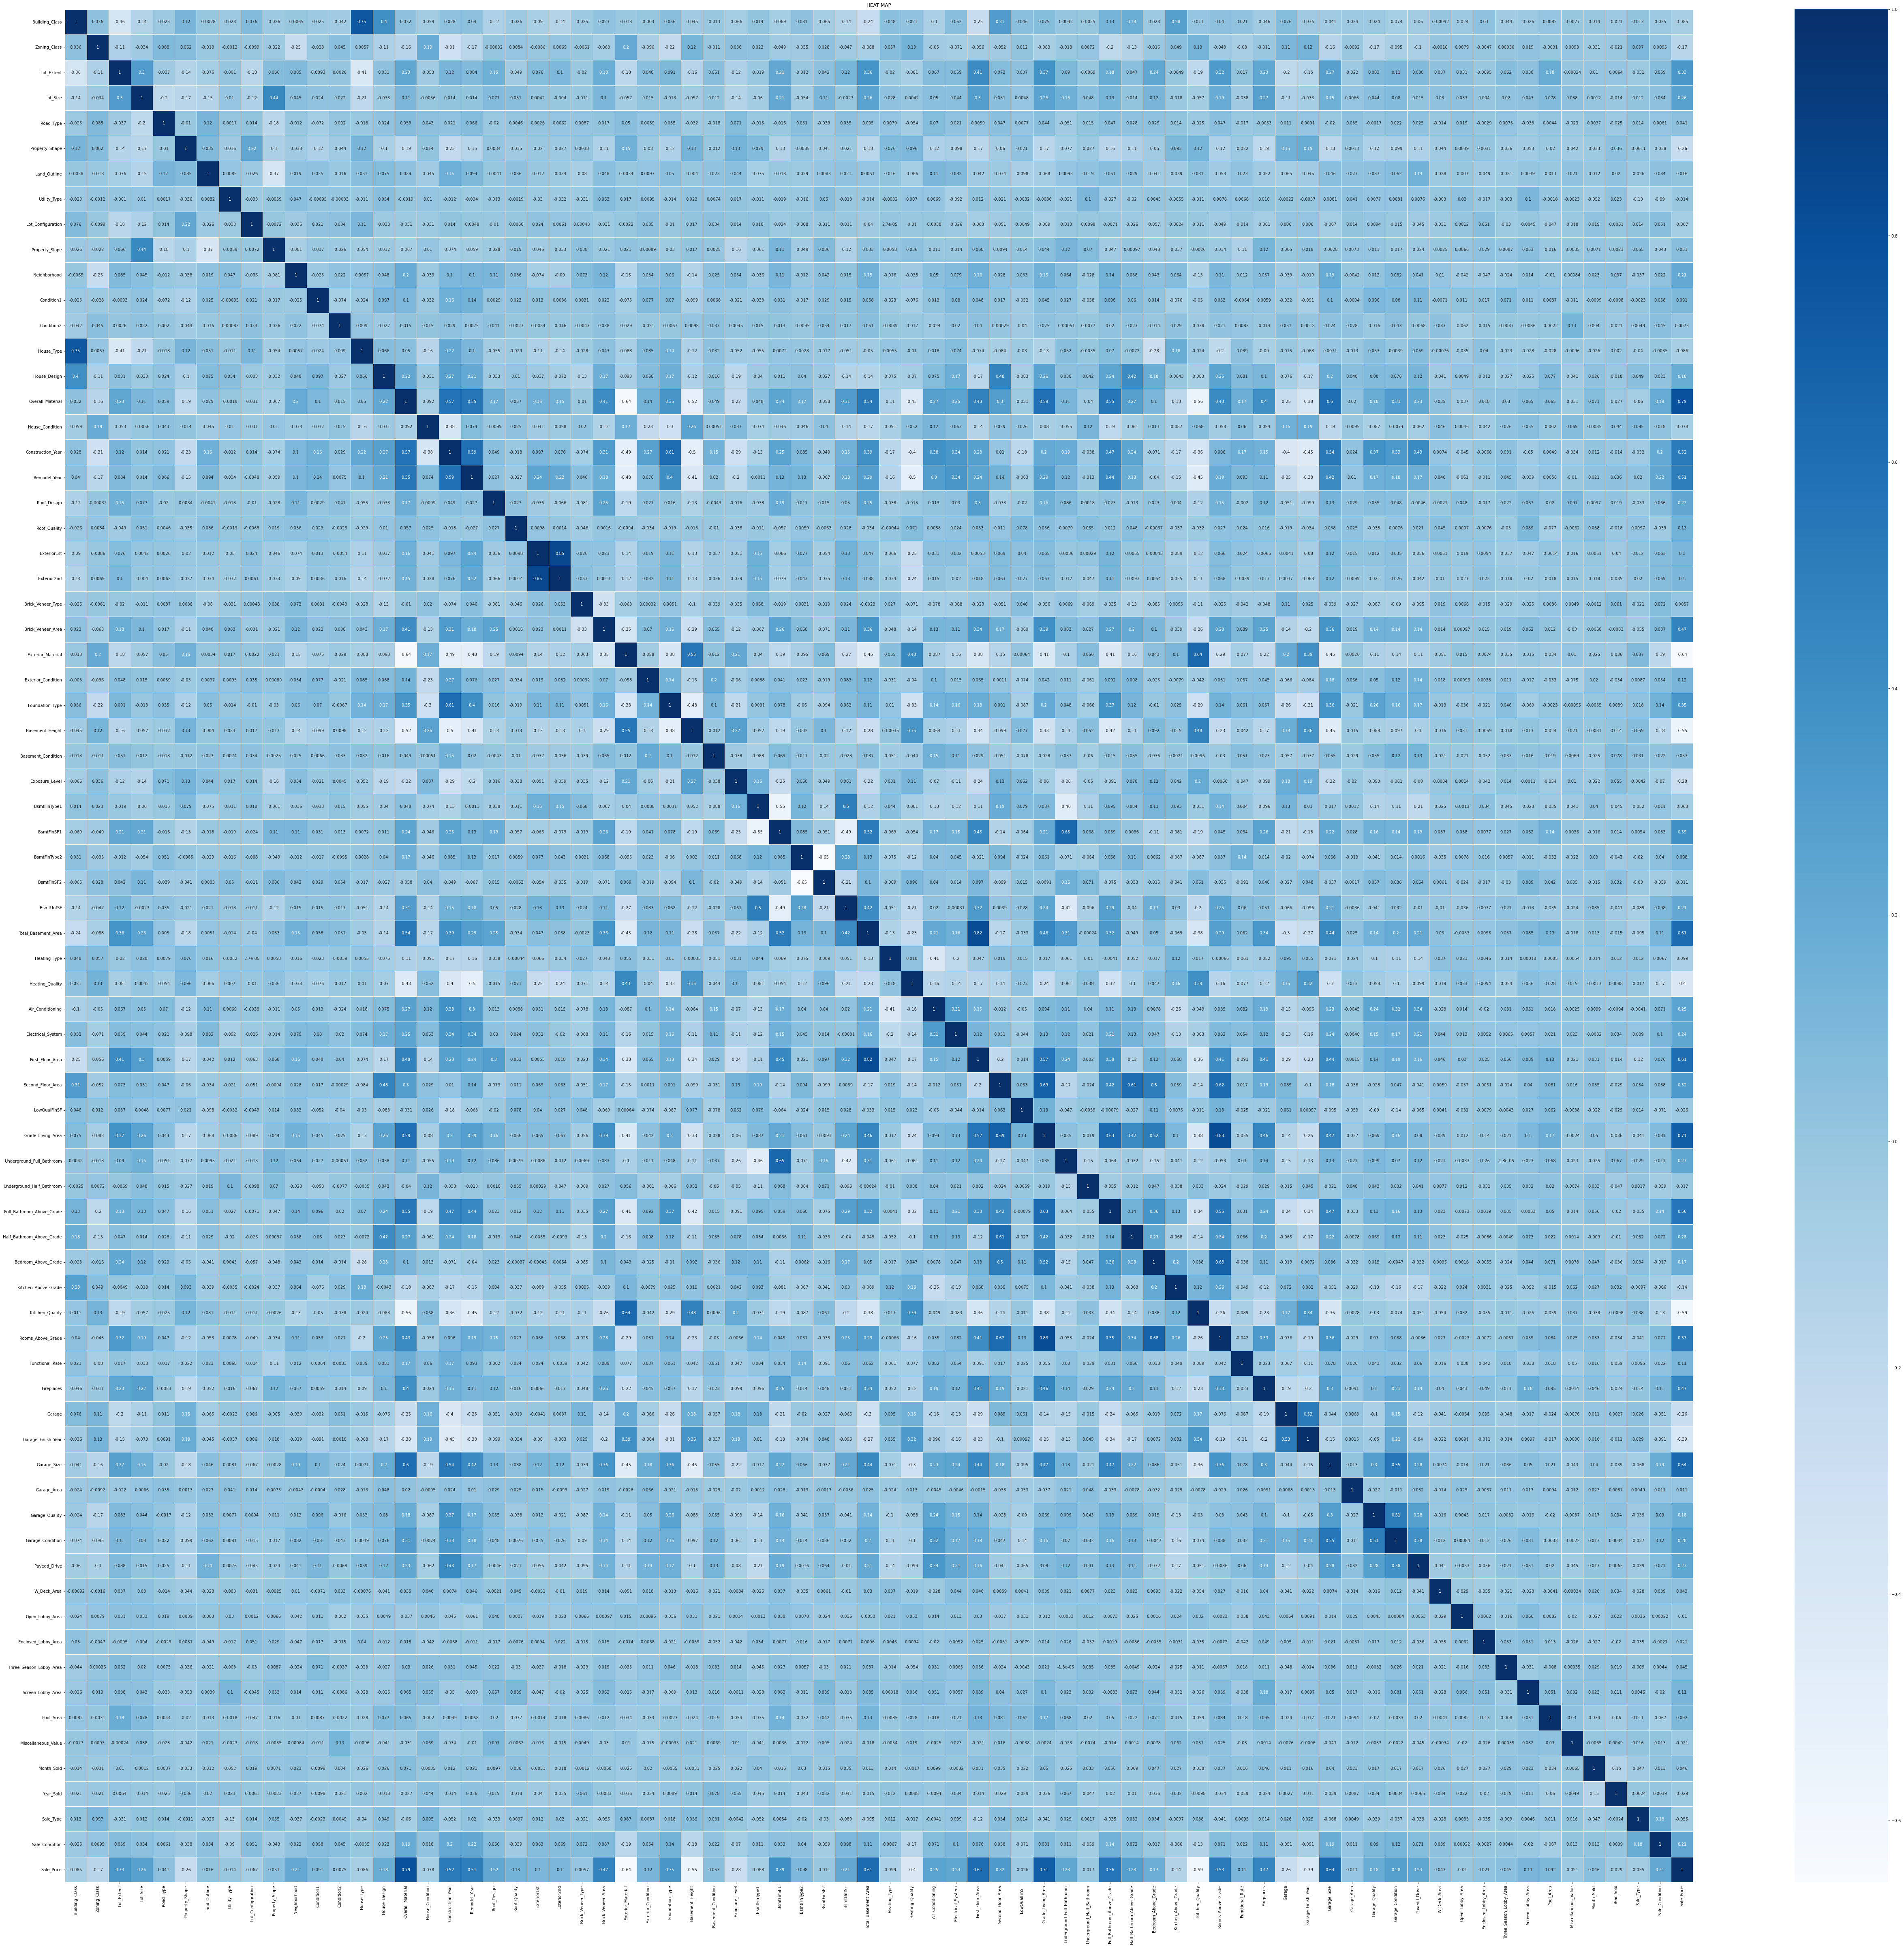

In [33]:
plt.figure(figsize=(90,85))
heatmap=sns.heatmap(train_1,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title('HEAT MAP')
plt.show()

# outlier treatment

<AxesSubplot:>

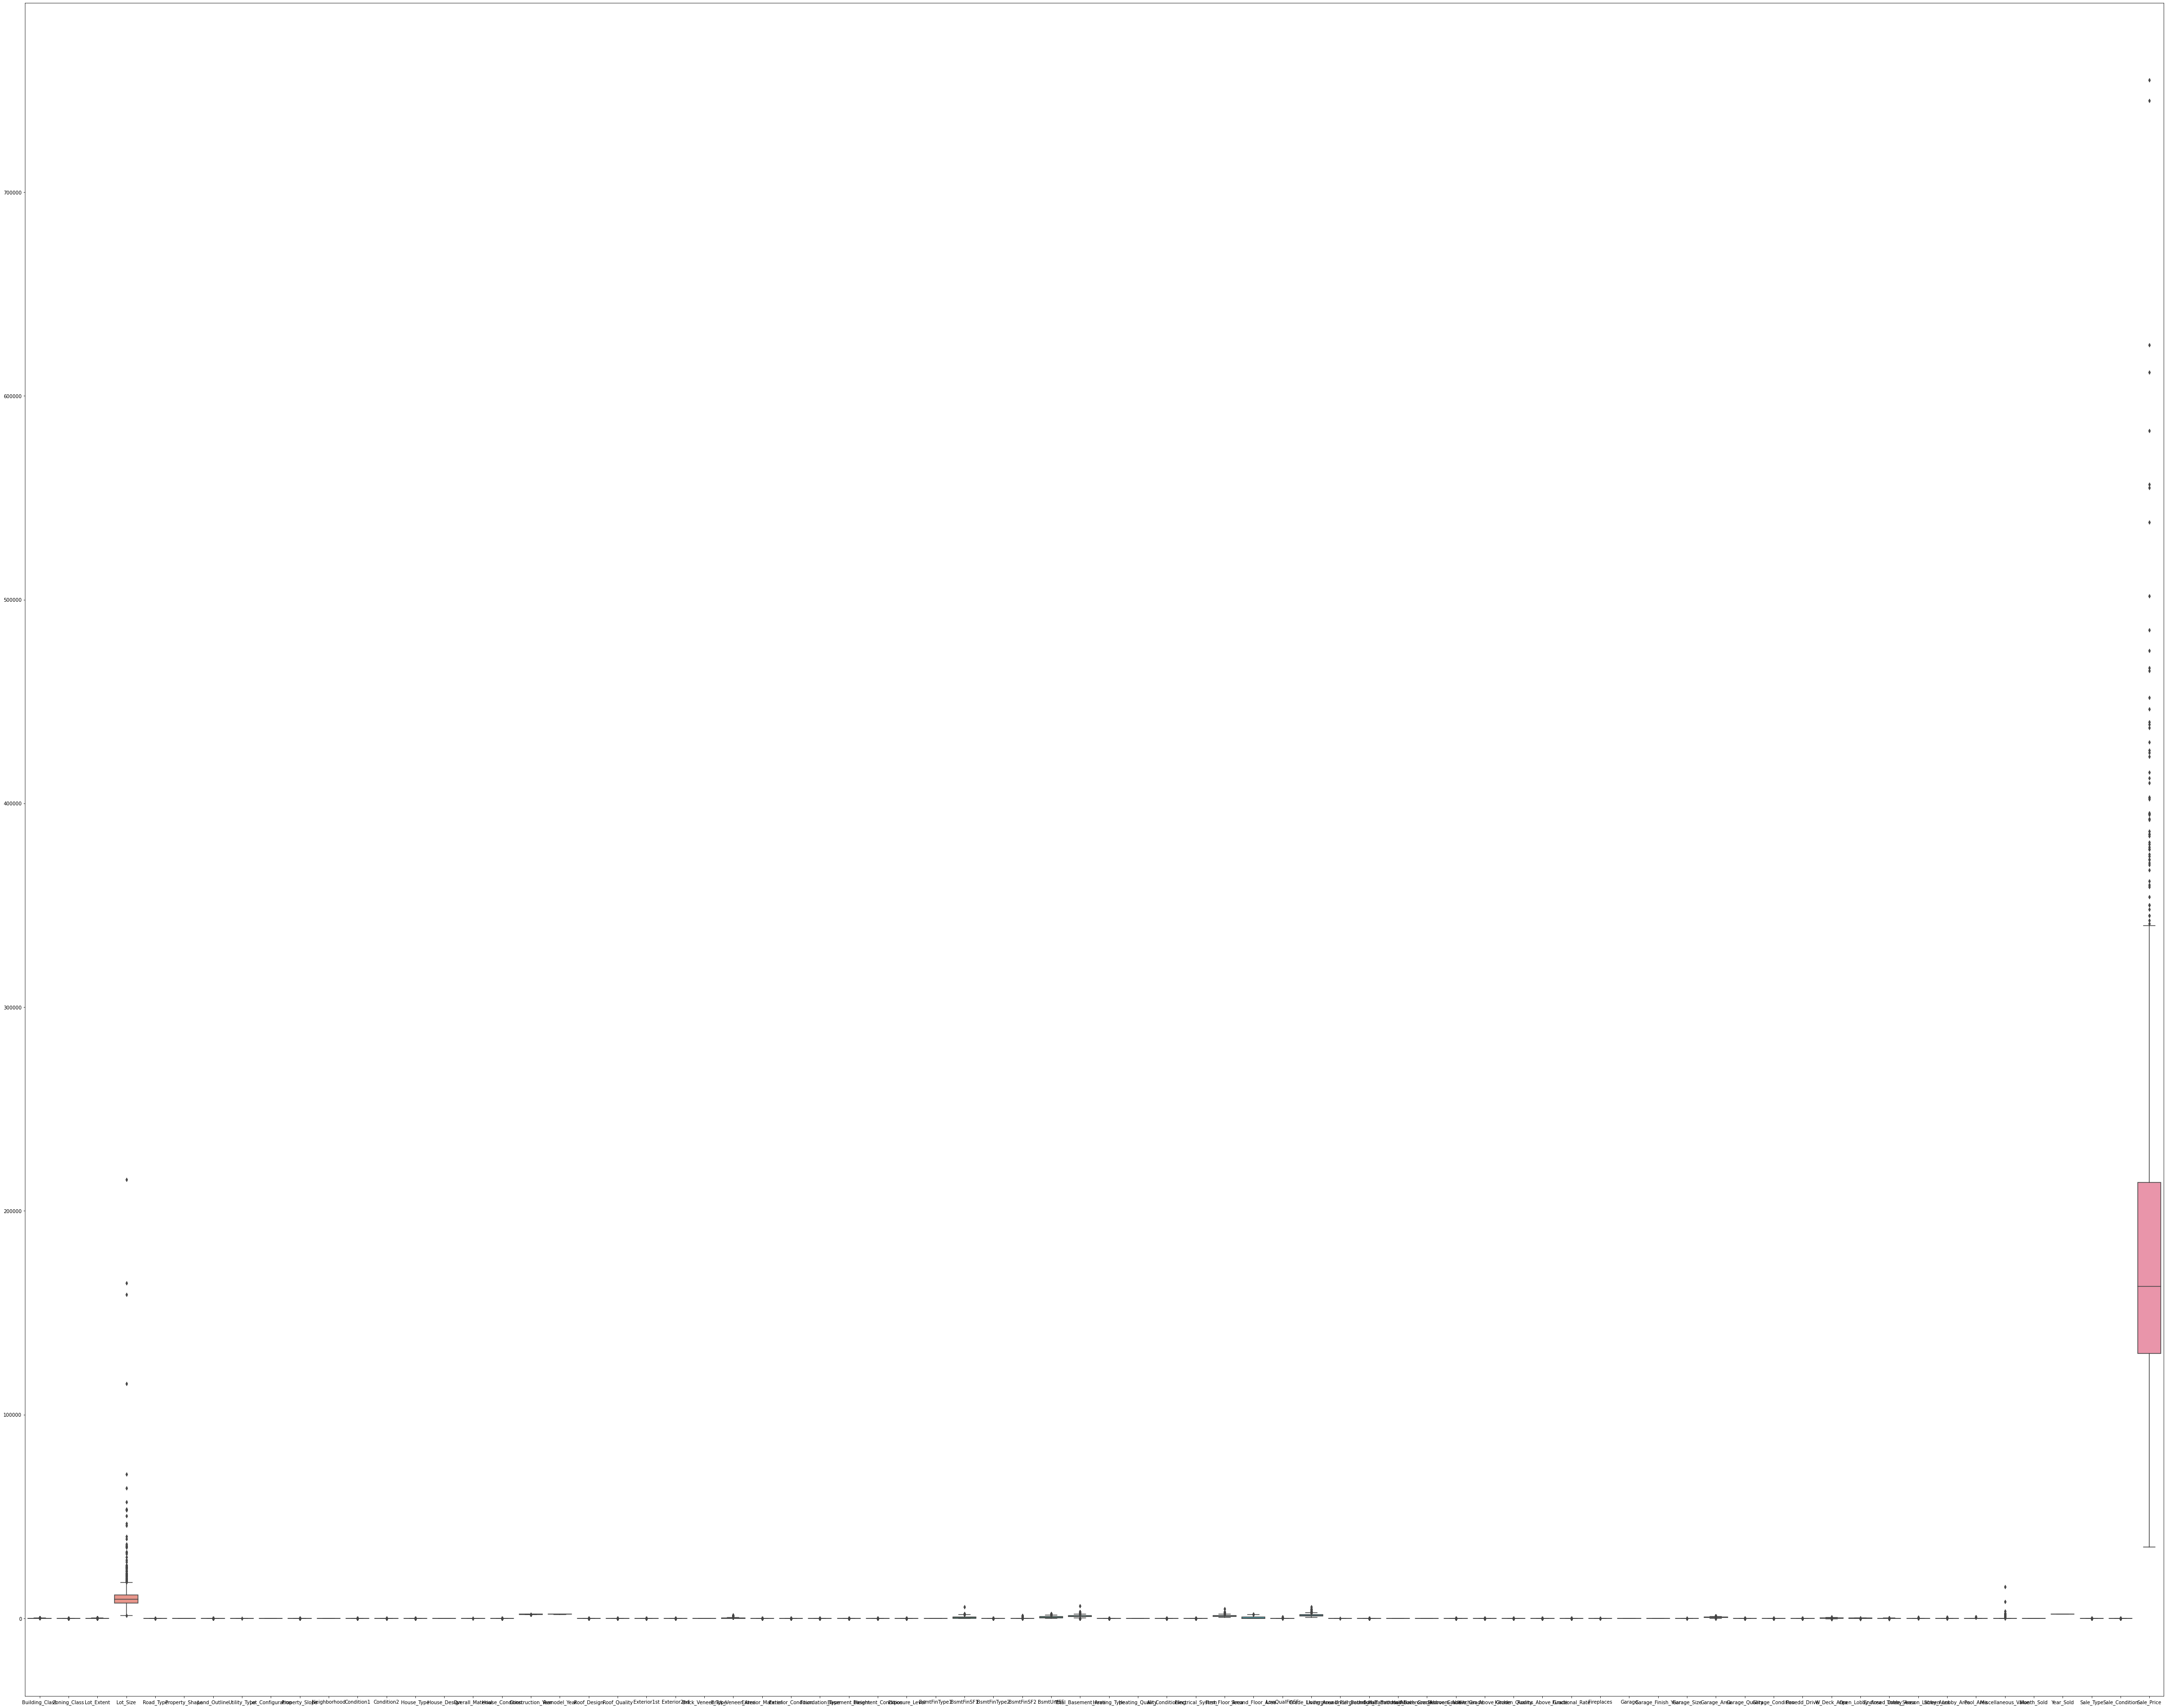

In [34]:
fig=plt.figure(figsize=(80,65))
sns.boxplot(data=train)

In [35]:
import math
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
numerical_features = list(train.select_dtypes(include=[np.number]).columns.values)

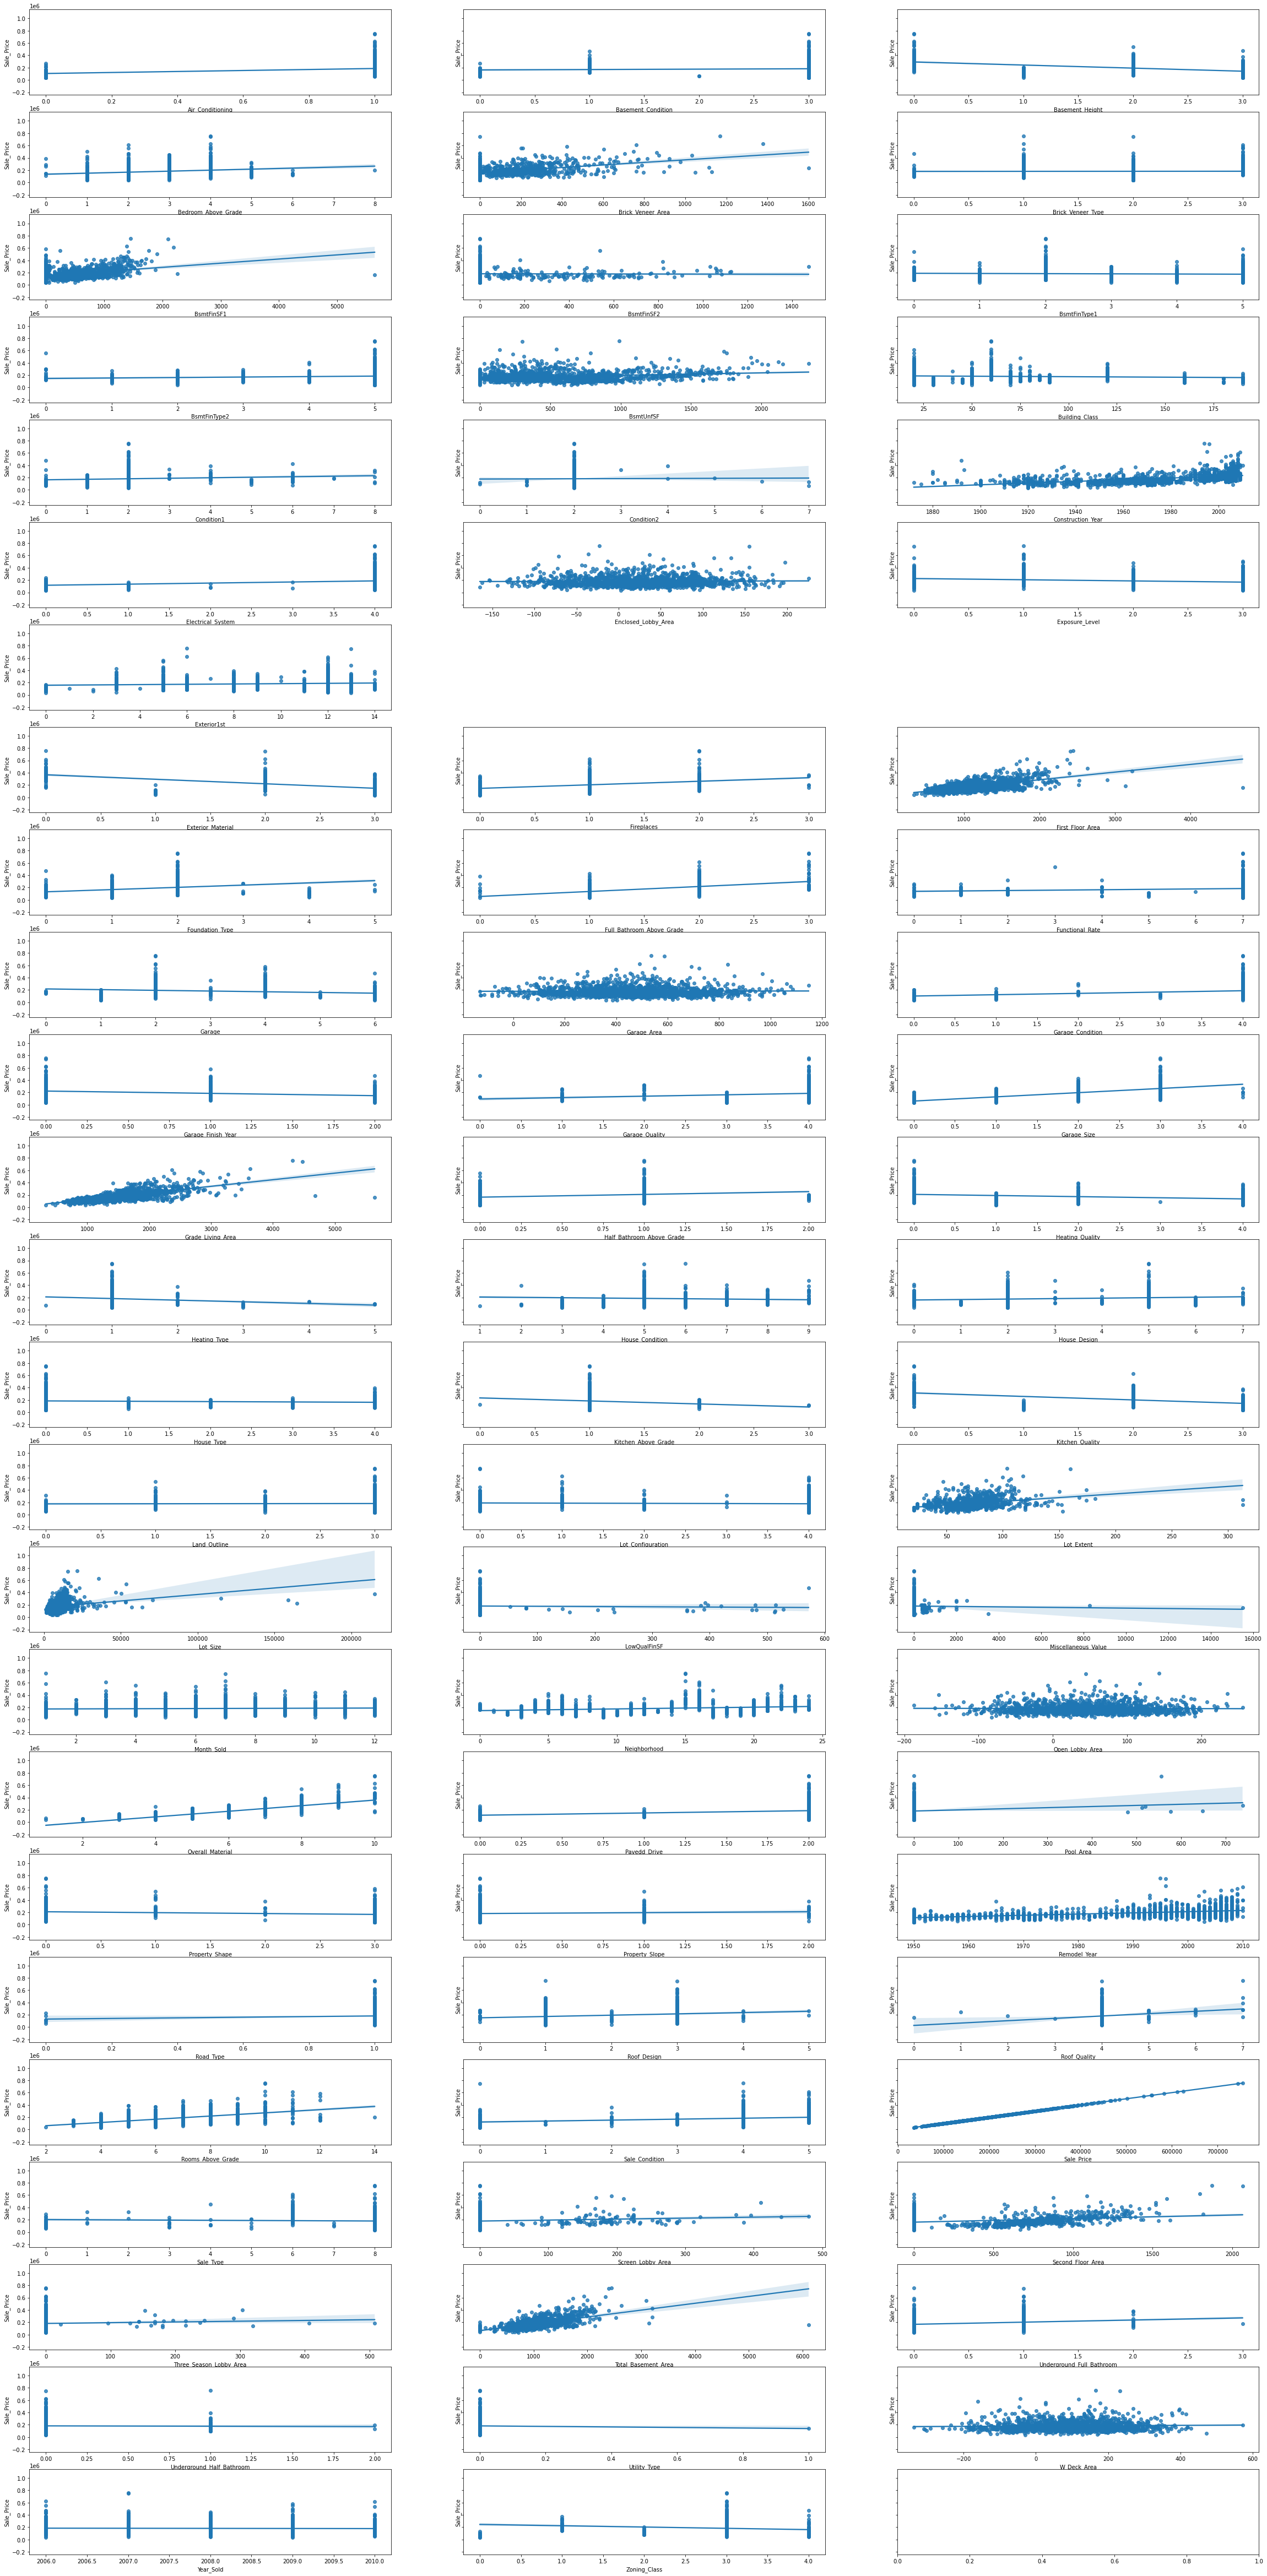

In [37]:
fig,ax = plt.subplots(math.ceil(len(numerical_features)/3),3,figsize=(40,85),sharey=True)
i ,j = 0, 0
for col in sorted(numerical_features):
    sns.regplot(col,'Sale_Price',data=train,ax=ax[i][j])
    if j == 2:
        j=0
        i +=1
    else:
        j +=1
ax[6][1].set_visible(False)
ax[6][2].set_visible(False)

<AxesSubplot:xlabel='Building_Class', ylabel='Density'>

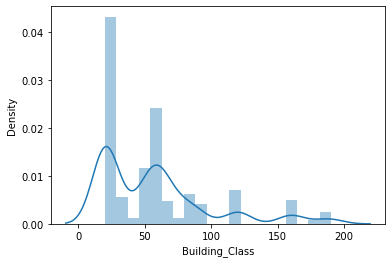

In [38]:
sns.distplot(train['Building_Class'])

<AxesSubplot:ylabel='Building_Class'>

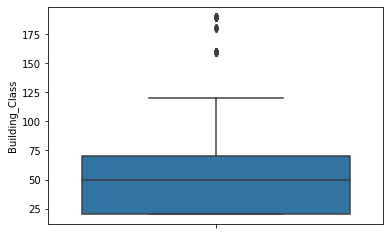

In [39]:
sns.boxplot(data=train,y='Building_Class')

# IQR Method

In [40]:
IQR=train.Building_Class.quantile(0.75)-train.Building_Class.quantile(0.25)     #IQR=Q3-Q1
IQR

50.0

In [41]:
lb=train["Building_Class"].quantile(0.25)-(IQR*3)    #q1-1.5*iqr---->lower(min) range value
ub=train["Building_Class"].quantile(0.75)+(IQR*3)    #q3+1.5*iqr----->upper(max) range value
lb,ub

(-130.0, 220.0)

In [42]:
train.loc[train['Building_Class']>220.0,'Building_Class']=220.0

<AxesSubplot:xlabel='Building_Class', ylabel='Density'>

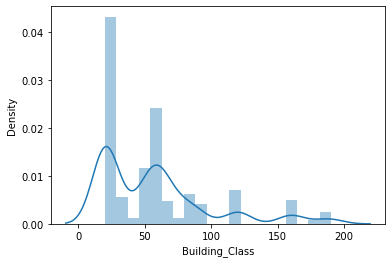

In [43]:
sns.distplot(train['Building_Class'])

<AxesSubplot:ylabel='Building_Class'>

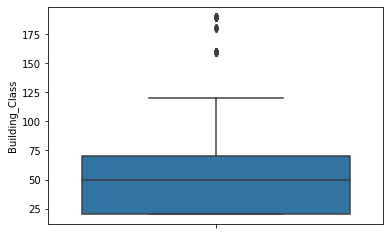

In [44]:
sns.boxplot(data=train,y='Building_Class')

<AxesSubplot:xlabel='Building_Class', ylabel='Density'>

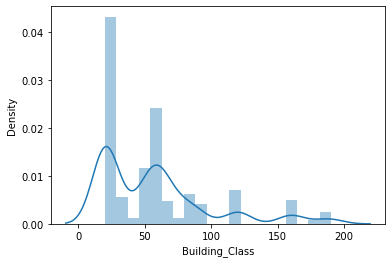

In [45]:
sns.distplot(train['Building_Class'])

<AxesSubplot:ylabel='Lot_Extent'>

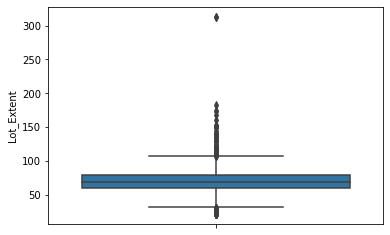

In [46]:
sns.boxplot(data=train,y='Lot_Extent')

In [47]:
IQR_1=train.Lot_Extent.quantile(0.75)-train.Lot_Extent.quantile(0.25)     #IQR=Q3-Q1
IQR_1

19.0

In [48]:
lb_1=train["Lot_Extent"].quantile(0.25)-(IQR_1*3)    #q1-1.5*iqr---->lower(min) range value
ub_1=train["Lot_Extent"].quantile(0.75)+(IQR_1*3)    #q3+1.5*iqr----->upper(max) range value
lb_1,ub_1

(3.0, 136.0)

In [49]:
train.loc[train['Lot_Extent']>136.0,'Lot_Extent']=136.0

<AxesSubplot:xlabel='Lot_Extent', ylabel='Density'>

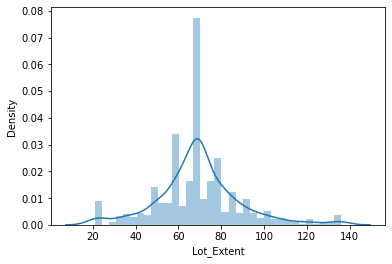

In [50]:
sns.distplot(train['Lot_Extent'])

<AxesSubplot:ylabel='Lot_Extent'>

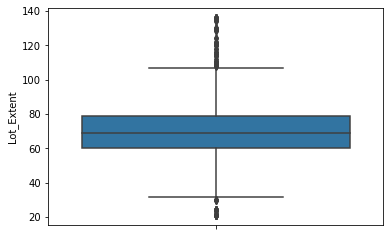

In [51]:
sns.boxplot(data=train,y='Lot_Extent')

<AxesSubplot:xlabel='Lot_Size', ylabel='Density'>

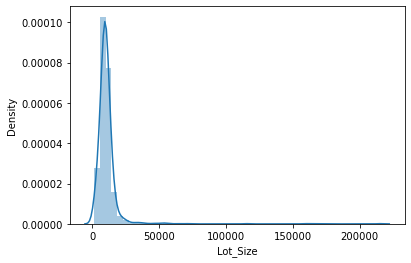

In [52]:
sns.distplot(train['Lot_Size'])

<AxesSubplot:ylabel='Lot_Size'>

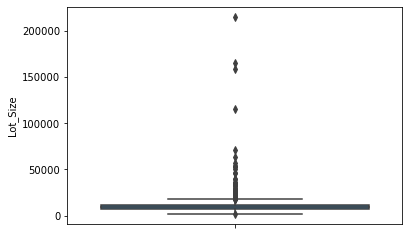

In [53]:
sns.boxplot(data=train,y='Lot_Size')

In [54]:
IQR_2=train.Lot_Size.quantile(0.75)-train.Lot_Size.quantile(0.25)     #IQR=Q3-Q1
IQR_2

4054.0

In [55]:
lb_2=train["Lot_Size"].quantile(0.25)-(IQR_2*3)    #q1-1.5*iqr---->lower(min) range value
ub_2=train["Lot_Size"].quantile(0.75)+(IQR_2*3)    #q3+1.5*iqr----->upper(max) range value
lb_2,ub_2

(-4613.0, 23765.0)

In [56]:
train.loc[train['Lot_Size']>23765.0,'Lot_Size']=23765.0

<AxesSubplot:xlabel='Lot_Size', ylabel='Density'>

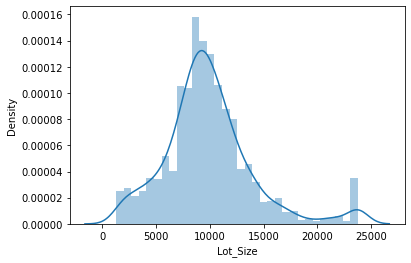

In [57]:
sns.distplot(train['Lot_Size'])

<AxesSubplot:ylabel='Lot_Size'>

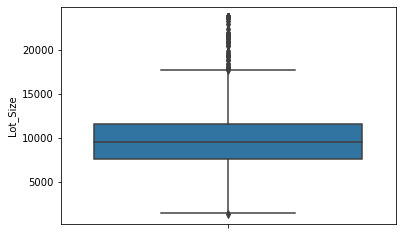

In [58]:
sns.boxplot(data=train,y='Lot_Size')

<AxesSubplot:xlabel='Overall_Material', ylabel='Density'>

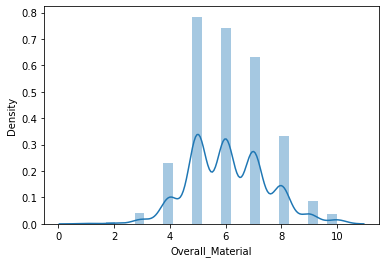

In [59]:
sns.distplot(train['Overall_Material'])

<AxesSubplot:ylabel='Overall_Material'>

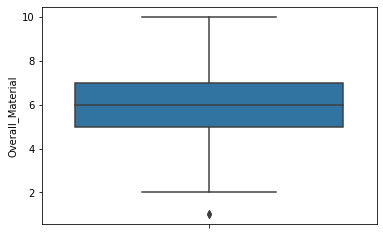

In [60]:
sns.boxplot(data=train,y='Overall_Material')

In [61]:
IQR_3=train.Lot_Size.quantile(0.75)-train.Lot_Size.quantile(0.25)     #IQR=Q3-Q1
IQR_3

4054.0

In [62]:
lb_3=train["Overall_Material"].quantile(0.25)-(IQR_3*3)    #q1-1.5*iqr---->lower(min) range value
ub_3=train["Overall_Material"].quantile(0.75)+(IQR_3*3)    #q3+1.5*iqr----->upper(max) range value
lb_3,ub_3

(-12157.0, 12169.0)

In [63]:
train.loc[train['Overall_Material']> 12169.0,'Overall_Material']= 12169.0

<AxesSubplot:xlabel='Overall_Material', ylabel='Density'>

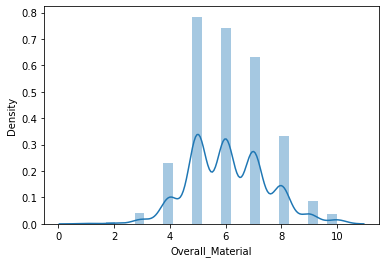

In [64]:
sns.distplot(train['Overall_Material'])

<AxesSubplot:ylabel='Lot_Size'>

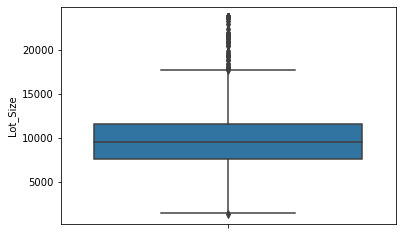

In [65]:
sns.boxplot(data=train,y='Lot_Size')

<AxesSubplot:xlabel='House_Condition', ylabel='Density'>

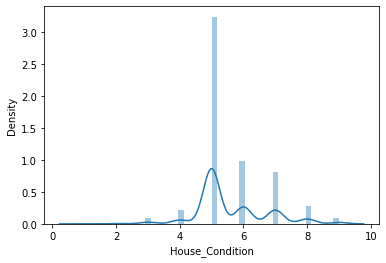

In [66]:
sns.distplot(train['House_Condition'])

<AxesSubplot:ylabel='House_Condition'>

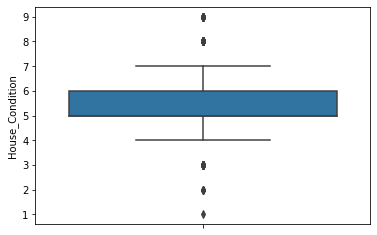

In [67]:
sns.boxplot(data=train,y='House_Condition')

In [68]:
IQR_4=train.Lot_Size.quantile(0.75)-train.Lot_Size.quantile(0.25)     #IQR=Q3-Q1
IQR_4

4054.0

In [69]:
lb_4=train["House_Condition"].quantile(0.25)-(IQR_4*3)    #q1-1.5*iqr---->lower(min) range value
ub_4=train["House_Condition"].quantile(0.75)+(IQR_4*3)    #q3+1.5*iqr----->upper(max) range value
lb_4,ub_4

(-12157.0, 12168.0)

In [70]:
train.loc[train['House_Condition']>12168.0,'House_Condition']=12168.0

<AxesSubplot:xlabel='House_Condition', ylabel='Density'>

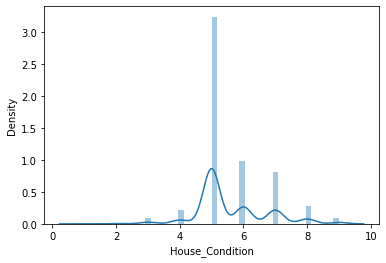

In [71]:
sns.distplot(train['House_Condition'])

<AxesSubplot:ylabel='House_Condition'>

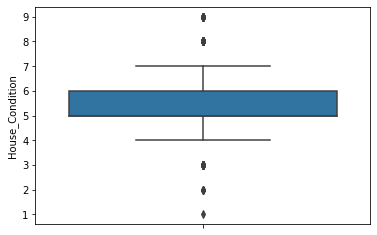

In [72]:
sns.boxplot(data=train,y='House_Condition')

<AxesSubplot:xlabel='Brick_Veneer_Area', ylabel='Density'>

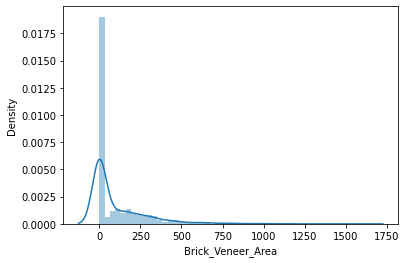

In [73]:
sns.distplot(train['Brick_Veneer_Area'])

<AxesSubplot:ylabel='Brick_Veneer_Area'>

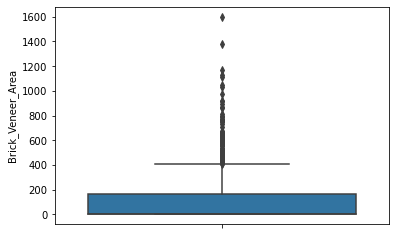

In [74]:
sns.boxplot(data=train,y='Brick_Veneer_Area')

In [75]:
IQR_5=train.Lot_Size.quantile(0.75)-train.Lot_Size.quantile(0.25)     #IQR=Q3-Q1
IQR_5

4054.0

In [76]:
lb_5=train["Brick_Veneer_Area"].quantile(0.25)-(IQR_5*3)    #q1-1.5*iqr---->lower(min) range value
ub_5=train["Brick_Veneer_Area"].quantile(0.75)+(IQR_5*3)    #q3+1.5*iqr----->upper(max) range value
lb_5,ub_5

(-12162.0, 12326.5)

In [77]:
train.loc[train['Brick_Veneer_Area']>12326.0,'Brick_Veneer_Area']=12326.0

<AxesSubplot:xlabel='Brick_Veneer_Area', ylabel='Density'>

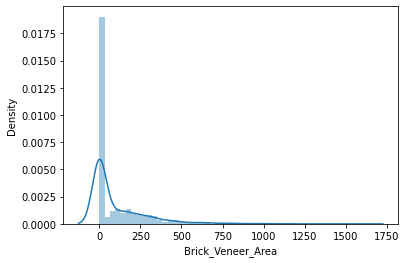

In [78]:
sns.distplot(train['Brick_Veneer_Area'])

<AxesSubplot:ylabel='Brick_Veneer_Area'>

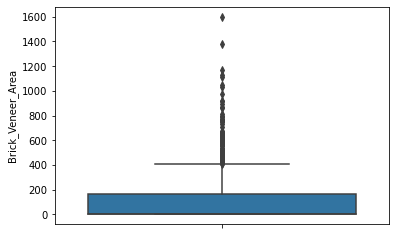

In [79]:
sns.boxplot(data=train,y='Brick_Veneer_Area')

<AxesSubplot:xlabel='Total_Basement_Area', ylabel='Density'>

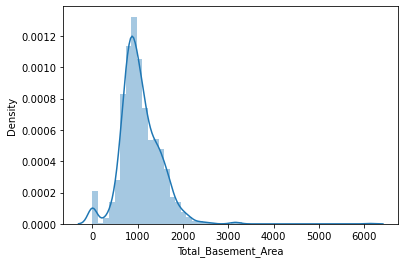

In [80]:
sns.distplot(train['Total_Basement_Area'])

<AxesSubplot:ylabel='Total_Basement_Area'>

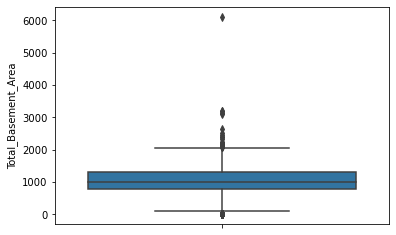

In [81]:
sns.boxplot(data=train,y='Total_Basement_Area')

<AxesSubplot:>

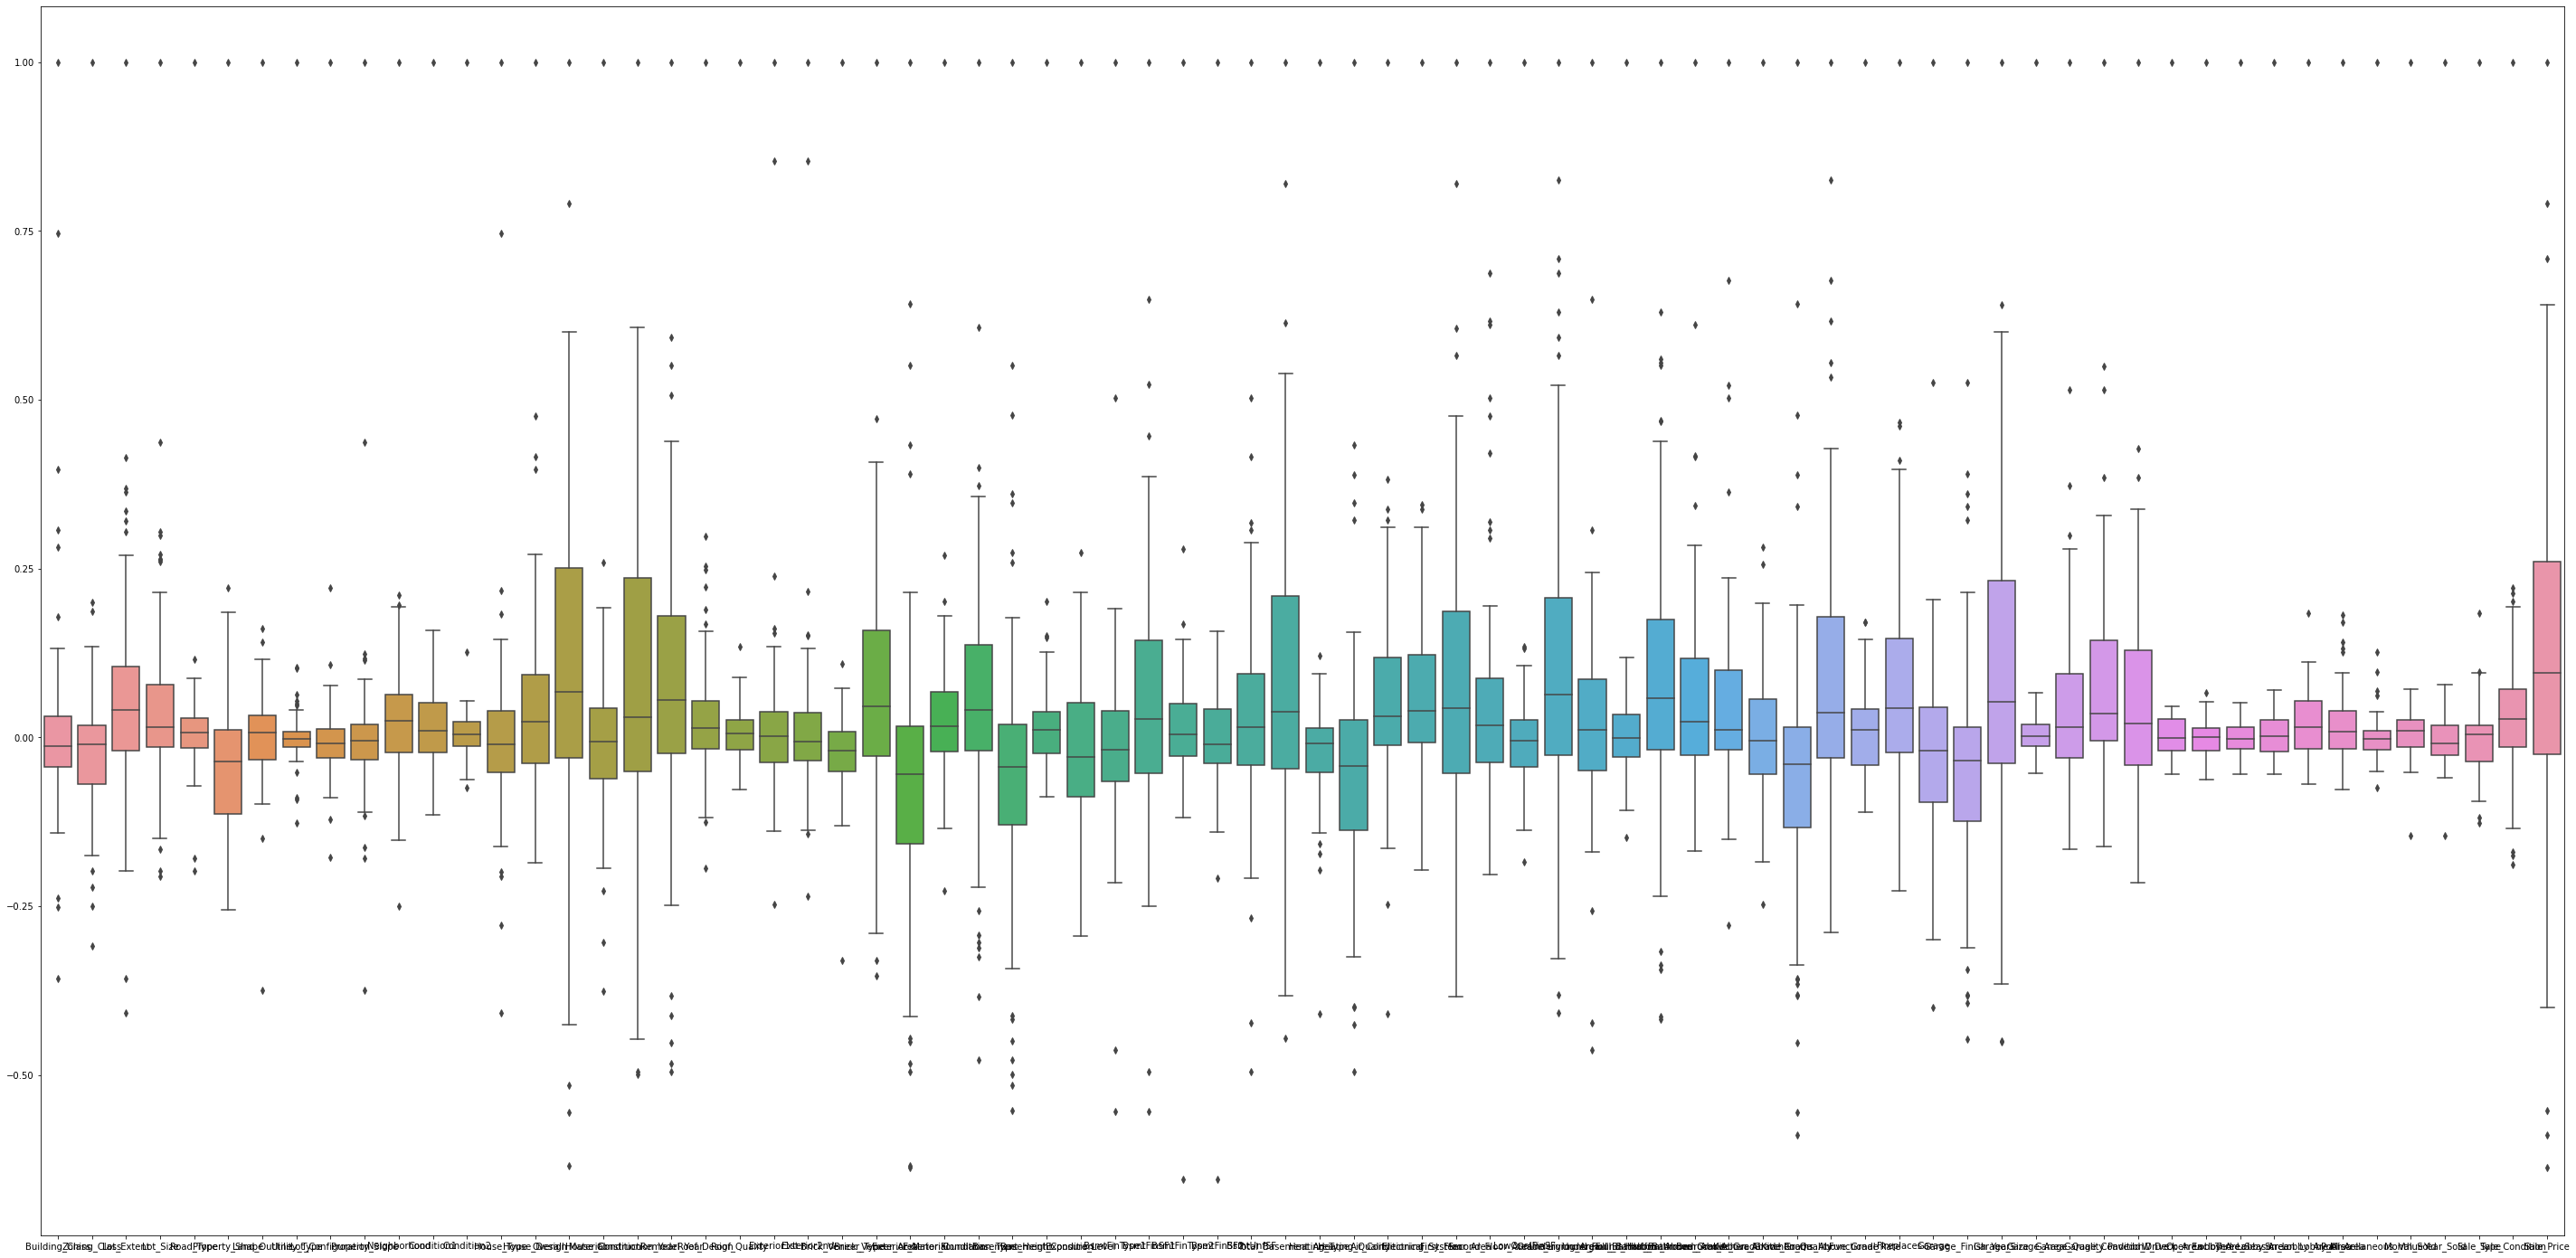

In [82]:
fig=plt.figure(figsize=(50,25))
sns.boxplot(data=train_1)

In [83]:
train.shape

(1459, 74)

# Building model on train data


In [84]:
train_x=train.iloc[:,1:74]
train_y=train.iloc[:,-1]
train_x.shape,train_y.shape

((1459, 73), (1459,))

In [85]:
train_y.head(2)

0    208500
1    181500
Name: Sale_Price, dtype: int64

In [86]:
import sklearn
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2,random_state=101)

In [88]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1167, 73), (292, 73), (1167,), (292,))

# Linear regression method

In [89]:
from sklearn import linear_model
lin=linear_model.LinearRegression()

In [90]:
lin.fit(x_train,y_train)

LinearRegression()

In [91]:
lin_pred=lin.predict(x_test)
lin_pred

array([129000., 169500.,  86000., 159000., 149900., 158000., 244000.,
       179200., 189950., 145250., 139000., 184000., 311500., 162000.,
       129000., 125000., 240000., 255000., 114504., 135000., 105000.,
       412500., 197500., 208500.,  52500., 109900., 117000., 155000.,
       107500., 127000., 184000., 133000., 244000., 178000., 135000.,
       128000., 367294., 156000., 402861., 223500., 175900., 208900.,
       226700., 132500., 190000., 153500., 104900., 127000., 135960.,
        37900., 124000., 152000., 150000., 133000., 172785.,  80000.,
        93500., 166000., 174000., 144000., 174000., 157000., 107500.,
       272000., 187500., 294000., 179900., 180500., 146800., 136500.,
       176000., 135000., 187000., 123000., 106250., 302000., 124500.,
        83500., 194500.,  84000., 133500., 235000., 165400., 150750.,
       135000., 220000., 230000., 108000., 165000., 148000., 176000.,
       395000., 187500., 139000., 108480., 250000., 169000., 319900.,
       122500., 2170

In [92]:
lin.intercept_

-3.4924596548080444e-10

In [93]:
lin.coef_

array([-6.75205798e-12,  2.06390460e-13, -2.97678548e-15, -1.13041878e-10,
        1.54729094e-12, -2.61831095e-12,  7.09694263e-11,  1.17446439e-12,
       -5.45326111e-12,  8.22449761e-13,  1.74784530e-12,  1.86597534e-11,
        1.17393593e-12, -4.41224179e-13, -1.08482076e-11, -1.82938940e-12,
        1.13780059e-13, -6.89030538e-14, -2.50622017e-12,  9.67938495e-12,
        1.45935928e-12, -1.11332182e-12,  1.19362098e-12,  1.28278058e-14,
        3.91786413e-13,  5.62784428e-13, -3.43950766e-12,  7.17938144e-12,
       -2.54003196e-12, -1.13824239e-13,  2.05707318e-13, -1.79218619e-15,
       -9.90209260e-13, -9.41976193e-15, -3.88483191e-15, -1.50889772e-14,
        5.08133202e-12, -7.45600064e-13,  8.38588358e-13, -1.13105018e-12,
       -5.24706418e-15, -1.13883241e-14,  2.37175730e-14,  7.07996216e-15,
        2.36506644e-12,  1.10927391e-12, -5.65791718e-12, -3.25041291e-12,
        6.16625773e-12,  4.20080189e-12,  5.99777914e-12, -1.90190473e-12,
       -4.63182332e-13,  

In [94]:
R2=lin.score(x_train,y_train)
R2

1.0

In [95]:
AdjR2=1-(((1-R2)*(1167-1))/(1167-73-1))
AdjR2

1.0

# Lasso method

In [96]:
#LASSO(L1)
from sklearn.linear_model import Lasso
lasso=Lasso()

In [97]:
lasso.fit(x_train,y_train)

Lasso()

In [98]:
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00, -1.90619311e-06, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -1.78093652e-04,
        0.00000000e+00, -1.24175104e-04, -1.45480512e-04, -4.80344527e-05,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.33664276e-04, -2.97782480e-05,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [99]:
l_p=lasso.predict(x_test)
l_p

array([129000.01532108, 169500.01052921,  86000.00167354, 158999.96926567,
       149899.95186824, 157999.95776826, 243999.89933672, 179199.9682512 ,
       189950.01198473, 145249.95387938, 139000.00748057, 183999.99337582,
       311500.08103903, 161999.9790849 , 128999.96818463, 125000.00353907,
       239999.95074775, 254999.9853865 , 114503.99578155, 134999.98239449,
       105000.00418731, 412500.0063362 , 197500.03888421, 208499.98863545,
        52499.98792109, 109900.18725353, 116999.9868627 , 154999.98611294,
       107500.01058873, 126999.991215  , 183999.97287581, 132999.9884582 ,
       243999.93742788, 178000.01066516, 135000.03300515, 127999.9731871 ,
       367294.00401138, 155999.99229864, 402860.99981889, 223499.99274514,
       175900.00152366, 208900.01562141, 226700.00184616, 132499.9866229 ,
       189999.94070663, 153499.97232898, 104899.99549909, 127000.00984047,
       135959.97259257,  37899.97279667, 124000.0027987 , 151999.99601232,
       149999.93139022, 1

In [100]:
l_R2=lasso.score(x_train,y_train)
l_R2

0.9999999999996589

In [101]:
Adjl_R2=1-(((1-l_R2)*(1167-1))/(1167-73-1))
Adjl_R2

0.9999999999996362

In [102]:
train_df=pd.DataFrame({"Impotances":list(lasso.coef_),"Columns":list(train_x)})
train_df

,Impotances,Columns
0,-0.000000,Zoning_Class
1,0.000000,Lot_Extent
2,-0.000002,Lot_Size
3,-0.000000,Road_Type
4,-0.000000,Property_Shape
...,...,...
68,-0.000000,Month_Sold
69,-0.000000,Year_Sold
70,0.000000,Sale_Type
71,0.000000,Sale_Condition


# Ridge method

In [103]:
from sklearn.linear_model import Ridge
rd=Ridge()

In [104]:
rd.fit(x_train,y_train)

Ridge()

In [105]:
r_p=rd.predict(x_test)
r_p

array([129000.00000009, 169500.00000001,  85999.99999998, 158999.99999999,
       149900.00000002, 158000.00000003, 244000.0000001 , 179200.00000001,
       189949.99999998, 145250.00000001, 139000.00000002, 184000.00000001,
       311499.99999992, 161999.99999998, 128999.99999998, 124999.99999997,
       240000.00000001, 255000.00000001, 114504.00000001, 134999.99999999,
       105000.00000001, 412499.99999998, 197499.99999998, 208500.00000001,
        52500.00000001, 109899.99999998, 117000.        , 155000.00000003,
       107500.00000001, 126999.99999999, 184000.00000004, 133000.        ,
       244000.00000004, 178000.00000004, 135000.        , 127999.99999999,
       367293.99999999, 156000.        , 402860.99999998, 223499.99999999,
       175900.00000001, 208899.99999999, 226699.99999998, 132499.99999999,
       190000.00000005, 153500.00000005, 104900.00000001, 126999.99999999,
       135960.00000001,  37900.00000001, 124000.        , 152000.        ,
       149999.99999997, 1

In [106]:
rd.coef_

array([-5.97759450e-10, -2.67483231e-11,  1.53819020e-12,  2.27336287e-08,
       -4.55306749e-10,  1.11158996e-09, -1.69752969e-08, -2.09148529e-10,
        4.22794242e-09,  3.18137206e-10, -2.14896279e-09, -1.26727474e-08,
       -3.45737315e-09, -1.20273415e-09,  1.01646276e-08,  6.21070157e-09,
        2.64952373e-10,  1.76389812e-11,  8.00205294e-10,  5.93687360e-09,
       -5.34189154e-10,  1.51905650e-11,  5.68620791e-09,  3.65870028e-11,
       -8.28057830e-09,  1.03436081e-10,  1.65343441e-09, -1.00071224e-08,
        1.88265851e-09, -2.81753222e-09,  2.96912138e-10, -8.75218847e-07,
        8.23907632e-10, -8.75225033e-07, -8.75241988e-07,  8.75270231e-07,
       -4.98465820e-09, -1.08493895e-09, -2.68462151e-09, -2.86271988e-10,
        1.12905659e-05,  1.12905755e-05,  1.12904985e-05, -1.12905186e-05,
        6.94744825e-10, -3.36019210e-09,  1.52753185e-10,  7.62684614e-10,
       -5.54780260e-09, -1.90254883e-08, -7.52501321e-09,  2.56263937e-09,
        2.61648185e-09,  

In [107]:
rd_r2=rd.score(x_train,y_train)
rd_r2

1.0

In [108]:
ad_rd2=1-(((1-rd_r2)*(1167-1))/(1167-73-1))
ad_rd2

1.0

In [109]:
r_df=pd.DataFrame({"coeff":list(rd.coef_),"column":list(train_x)})
r_df

,coeff,column
0,-5.977594e-10,Zoning_Class
1,-2.674832e-11,Lot_Extent
2,1.538190e-12,Lot_Size
3,2.273363e-08,Road_Type
4,-4.553067e-10,Property_Shape
...,...,...
68,-1.372818e-10,Month_Sold
69,-3.956311e-10,Year_Sold
70,-6.934726e-10,Sale_Type
71,3.223784e-09,Sale_Condition


In [110]:
l1=["linear","lasso","ridge"]
l2=[R2,l_R2 ,rd_r2]
l3=[AdjR2,Adjl_R2 , ad_rd2]

In [111]:
final = pd.DataFrame({'modelname':l1,"R-Square":l2,"Adj_R-Square":l3})
final

,modelname,R-Square,Adj_R-Square
0,linear,1.0,1.0
1,lasso,1.0,1.0
2,ridge,1.0,1.0
